<img src="Logo.png" width="100" align="left"/> 

# <center> Preparatory Unit project:</center>



Congratulations on finishing the lessons content for this preparatory unit!!

At this stage it's important to test your theoritical concepts from a practical side and that's exactely the goal of this project.


## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in th slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will have a chance to practice most of the important aspects we saw throughout The Preparatory Unit.
This project is divided into 5 sections: 


1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [SQLite section](#sql)

4. [Data types section](#datatypes)

5. [Linear Algebra section](#algebra)


### 1. Setting the environement:  <a id='set_env'></a>

In [2]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

In [3]:
# To-Do: create a virtual environement called myenv
!Python3 -m venv myenv

In [5]:
# Activate the environement 
!source myenv/bin/activate

In [6]:
# Add this virtual environement to Jupyter notebook 
!pip install --user ipykernel
!python -m ipykernel install --user --name=myenv

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Installed kernelspec myenv in /Users/annamiller/Library/Jupyter/kernels/myenv


In [7]:
# Install the necessary dependencies 

!pip install scipy
!pip install numpy  
!pip install matplotlib
!pip install pandas

> Please check if you have sqlite installed on your device. For more informations head to the sql lesson 

### 2. Importing necessary tools:<a id='importing'></a>

In [9]:
# Add the specified directory to be able to open directory data
import sys
sys.path.append('/Users/annamiller/Library/Mobile Documents/com~apple~CloudDocs/Arbeit/Codelabs/Chapter0Prep Unit/prep_unit_project')

from data import database_manager as dm
# import utils with fixed indentation error and replaced np.float with np.float64 to make "4. Data types section" work
import utils_fixed as utils 
from matplotlib import pyplot
from linear_algebra import curve_fitting as cf

### 3. SQLite section : <a id='sql'></a>

In [10]:
# create a connection to the database
import sqlite3
connection = sqlite3.connect("longley.db")

# To-Do : retrieve rows of the table 
import pandas

# Query data from database
query = "select * from longley"
# Create dataframe
df = pandas.read_sql_query(query, connection)
# Initialize rows variable as list
rows = []

# Method to loop through rows and append row values from database to rows list
def row_list():
    for row in df.values:
        rows.append(tuple(row))

# Call method to retrieve rows and print
row_list()
print(rows)

[('83', '234.289', '235.6', '159', '107.608', '1947', '60.323'), ('88.5', '259.426', '232.5', '145.6', '108.632', '1948', '61.122'), ('88.2', '258.054', '368.2', '161.6', '109.773', '1949', '60.171'), ('89.5', '284.599', '335.1', '165', '110.929', '1950', '61.187'), ('96.2', '328.975', '209.9', '309.9', '112.075', '1951', '63.221'), ('98.1', '346.999', '193.2', '359.4', '113.27', '1952', '63.639'), ('99', '365.385', '187', '354.7', '115.094', '1953', '64.989'), ('100', '363.112', '357.8', '335', '116.219', '1954', '63.761'), ('101.2', '397.469', '290.4', '304.8', '117.388', '1955', '66.019'), ('104.6', '419.18', '282.2', '285.7', '118.734', '1956', '67.857'), ('108.4', '442.769', '293.6', '279.8', '120.445', '1957', '68.169'), ('110.8', '444.546', '468.1', '263.7', '121.95', '1958', '66.513'), ('112.6', '482.704', '381.3', '255.2', '123.366', '1959', '68.655'), ('114.2', '502.601', '393.1', '251.4', '125.368', '1960', '69.564'), ('115.7', '518.173', '480.6', '257.2', '127.852', '1961',

> Since at this stage we already retrieved our data it's more memory efficient to close the connection to our database.

In [11]:
#To-Do close connection using the close_connection function from the data_manager file (dm)
connection.close()

### 4. Data types section : <a id='datatypes'></a>


Let's check the datatypes of the retrieved rows

In [68]:
rows

[('83', '234.289', '235.6', '159', '107.608', '1947', '60.323'),
 ('88.5', '259.426', '232.5', '145.6', '108.632', '1948', '61.122'),
 ('88.2', '258.054', '368.2', '161.6', '109.773', '1949', '60.171'),
 ('89.5', '284.599', '335.1', '165', '110.929', '1950', '61.187'),
 ('96.2', '328.975', '209.9', '309.9', '112.075', '1951', '63.221'),
 ('98.1', '346.999', '193.2', '359.4', '113.27', '1952', '63.639'),
 ('99', '365.385', '187', '354.7', '115.094', '1953', '64.989'),
 ('100', '363.112', '357.8', '335', '116.219', '1954', '63.761'),
 ('101.2', '397.469', '290.4', '304.8', '117.388', '1955', '66.019'),
 ('104.6', '419.18', '282.2', '285.7', '118.734', '1956', '67.857'),
 ('108.4', '442.769', '293.6', '279.8', '120.445', '1957', '68.169'),
 ('110.8', '444.546', '468.1', '263.7', '121.95', '1958', '66.513'),
 ('112.6', '482.704', '381.3', '255.2', '123.366', '1959', '68.655'),
 ('114.2', '502.601', '393.1', '251.4', '125.368', '1960', '69.564'),
 ('115.7', '518.173', '480.6', '257.2', '127

> This is a list containing multiple tuples, each tuple is a row in the Table with each element within this tuple being a string.
We will be executing mathematical operations on these values and hence we need them in numerical format. Each value contains decimal fractions which means the suitable type to convert to is either double or float. In this case we need to convert these values to a float fomat. Head up to the "utils.py" file and set the function convert_to_floats to be able to do so.

In [12]:
# To-Do convert to an ndarray of floats by calling the function convert_to_floats from the utils file 
# make sure to set some requirements in that function before you call it here 
data = utils.convert_to_floats(rows)

convert_to_floats function called


In [13]:
# let's check the shape 
data.shape

(16, 7)

In [14]:
# Let's see the format 
data

array([[  83.   ,  234.289,  235.6  ,  159.   ,  107.608, 1947.   ,
          60.323],
       [  88.5  ,  259.426,  232.5  ,  145.6  ,  108.632, 1948.   ,
          61.122],
       [  88.2  ,  258.054,  368.2  ,  161.6  ,  109.773, 1949.   ,
          60.171],
       [  89.5  ,  284.599,  335.1  ,  165.   ,  110.929, 1950.   ,
          61.187],
       [  96.2  ,  328.975,  209.9  ,  309.9  ,  112.075, 1951.   ,
          63.221],
       [  98.1  ,  346.999,  193.2  ,  359.4  ,  113.27 , 1952.   ,
          63.639],
       [  99.   ,  365.385,  187.   ,  354.7  ,  115.094, 1953.   ,
          64.989],
       [ 100.   ,  363.112,  357.8  ,  335.   ,  116.219, 1954.   ,
          63.761],
       [ 101.2  ,  397.469,  290.4  ,  304.8  ,  117.388, 1955.   ,
          66.019],
       [ 104.6  ,  419.18 ,  282.2  ,  285.7  ,  118.734, 1956.   ,
          67.857],
       [ 108.4  ,  442.769,  293.6  ,  279.8  ,  120.445, 1957.   ,
          68.169],
       [ 110.8  ,  444.546,  468.1  ,  263.

### 5. Linear Algebra section: <a id='algebra'></a> 

In [15]:
# Let's check if the two variables GNP.deflator and year  are correlated 
x, y =  data[:,5],data[:, 0]

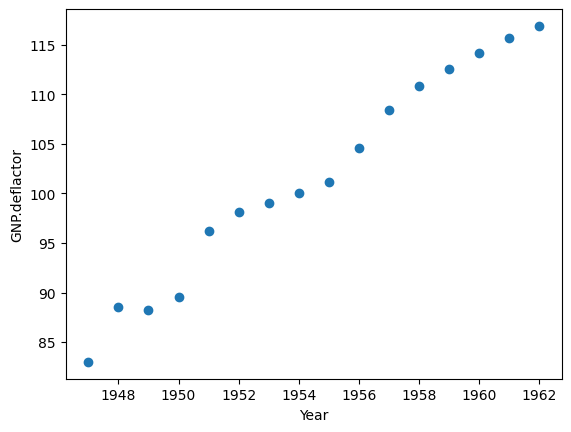

In [16]:
pyplot.scatter(x, y)
pyplot.xlabel("Year")
pyplot.ylabel("GNP.deflactor")
pyplot.show()

> You can clearly see that the two variables: GNP.deflator (y axis) and year (x axis). In other words the GNP.deflactor is increasing throughout the years.
Under this trend it makes sense that we can fit a line to these data points, a line that can describe this trend. And this is our task for this section. 

#### Explanation:
Curve fitting aims to find the perfect curve equation for a number of correlated variables. In our example we aim to find the equation for the line that can perfectly fit this point . Such a line should be at minimum distance from all points in average. 

Because we are dealing with two variables only, the line's equation should be of the form : y = a*x + b . Which is a typical linear equation.

To acheieve this you will have to : 

1. Head to the file linear_algebra/curve_fiiting.py file.

2. Set the objective  function's code (function set_objective), objective function is the function that returns the typical shape of our wanted linear equation ( a*x+b), Please delete the "pass" statement and write your code.

3. Here in this notebook in the cell below, call the function get_results and pass to it  x and y and get back the optimal values of "a" and "b".



In [17]:
# To-Do get the values of a and b using the get_result function 
a,b = cf.get_result(x,y)

y = 2.24662 * x + -4289.33284


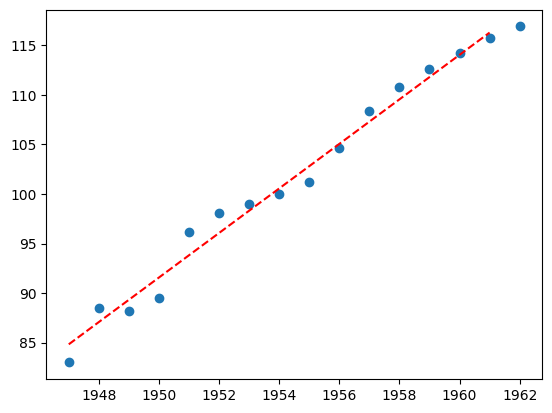

In [18]:
# plotting the result 
from numpy import arange

pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = cf.set_objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

> yohooo ! It's indeed working!!! 

# Final thoughts : 
This curve fitting process can have many use cases within the machine learning workflow. 

A curve fitting can be used as a way to fill in missing values. Datasets aren't always clean. In fact in 90% of the cases we need to do some pre-processing and cleaning for the data before using it in any analysis. In many cases, this cleaning can include filling the missing values, in other words you have some data points with some missing values for some  features, if we know that we have a "model" a curve that is supposed to model the trend(or correlation between two of our existing features we can use it to infer these missing values. So as a result Curve fitting can be used in the data cleaning step of the workflow.

Another use case, is when the curve fitting is our end goal, Thus we are cleaning and modeling because the end objective is to have such an equation, in this case the curve fitting is the heart of the Machine learning project.